In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import random
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
%matplotlib inline

In [2]:
# Read the data into dataframe
df = pd.read_excel('OBU_unique.xlsx')
df

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,CMFCUS1_AML_BUSINESS,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,...,CMFCUS1_Q_ID,CMFCUS1_PURPOSE,CMFCUS1_DERIVATIVE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CHANNEL,SAR
0,0,1,0,1,0,1,0,0,0,0,...,1,E,NA_TYPE,5Z,0,1,Z,0,1,N
1,1,1,0,1,0,1,1,0,0,0,...,37,6,NA_TYPE,5Z,0,NA_TYPE,4,0,1,N
2,0,1,0,1,0,1,0,0,0,0,...,1,4,NA_TYPE,1Z,0,1,Z,0,1,N
3,0,1,0,1,0,1,0,0,0,0,...,1,C,NA_TYPE,1Z,0,1,Z,0,1,N
4,0,1,0,1,0,1,0,0,0,0,...,1,E,NA_TYPE,1Z,0,1,Z,0,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,0,1,0,1,0,1,0,0,0,0,...,1,1,NA_TYPE,1Z,0,1,Z,0,1,N
9945,0,1,0,1,0,1,0,0,0,0,...,1,E,NA_TYPE,1Z,0,NA_TYPE,4,0,1,N
9946,0,1,0,1,0,1,0,0,0,0,...,1,E,NA_TYPE,1Z,0,NA_TYPE,4,0,1,N
9947,0,1,0,1,0,1,0,0,0,0,...,1,E,NA_TYPE,1Z,0,1,Z,0,1,N


In [3]:
# Preprocessing
# SAR_ALERT
df['SAR']=np.where(df['SAR']=='Y',1,0)
# Categorize
df['CHANNEL'] = df['CHANNEL'].astype(str)
df['CMFCUS1_Q_ID'] = df['CMFCUS1_Q_ID'].astype(str)
df['CMFCUS1_PURPOSE'] = df['CMFCUS1_PURPOSE'].astype(str)
df['CMFCUS1_DERIVATIVE'] = df['CMFCUS1_DERIVATIVE'].astype(str)
df['LN_TYP'] = df['LN_TYP'].astype(str)
df['CONFIRM_TYPE'] = df['CONFIRM_TYPE'].astype(str)
df['CORP_TYPE'] = df['CORP_TYPE'].astype(str)
df['CMFCUS25_BRANCH'] = df['CMFCUS25_BRANCH'].astype(str)

In [4]:
# fill NAs
df = df.fillna(value='NA_TYPE')

In [5]:
# X turn into dummies
X_dummy = df.iloc[:,:-1]
X_dummy = pd.get_dummies(X_dummy, drop_first=True)
X_dummy

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,CMFCUS1_AML_BUSINESS,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,...,CORP_TYPE_A,CORP_TYPE_NA_TYPE,CORP_TYPE_Z,CMFCUS25_BRANCH_1,CMFCUS25_BRANCH_2,CMFCUS25_BRANCH_3,CMFCUS25_BRANCH_4,CMFCUS25_BRANCH_NA_TYPE,CHANNEL_4,CHANNEL_5
0,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9945,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9946,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9947,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
df_new = pd.concat([X_dummy, df['SAR']],axis=1)
df_new

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,CMFCUS1_AML_BUSINESS,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,...,CORP_TYPE_NA_TYPE,CORP_TYPE_Z,CMFCUS25_BRANCH_1,CMFCUS25_BRANCH_2,CMFCUS25_BRANCH_3,CMFCUS25_BRANCH_4,CMFCUS25_BRANCH_NA_TYPE,CHANNEL_4,CHANNEL_5,SAR
0,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9945,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9946,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9947,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [7]:
X = df_new.iloc[:, 0:-1]

In [8]:
#'''
# Kmeans 分群
from sklearn.cluster import KMeans
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
yhat
#'''

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
# 譜聚類分群效果太差，群 1只有3個樣本點
'''
from sklearn.cluster import SpectralClustering
# define the model
model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
yhat
'''

'\nfrom sklearn.cluster import SpectralClustering\n# define the model\nmodel = SpectralClustering(n_clusters=2)\n# fit model and predict clusters\nyhat = model.fit_predict(X)\nyhat\n'

In [10]:
# 高斯混合模型
'''
from sklearn.mixture import GaussianMixture
# define the model
model = GaussianMixture(n_components=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
yhat
'''

'\nfrom sklearn.mixture import GaussianMixture\n# define the model\nmodel = GaussianMixture(n_components=2)\n# fit the model\nmodel.fit(X)\n# assign a cluster to each example\nyhat = model.predict(X)\nyhat\n'

In [11]:
df_cluster = pd.concat([df_new, pd.DataFrame(yhat)],axis=1)
df_cluster.columns.values[-1] = 'Cluster'
df_cluster

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,CMFCUS1_AML_BUSINESS,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,...,CORP_TYPE_Z,CMFCUS25_BRANCH_1,CMFCUS25_BRANCH_2,CMFCUS25_BRANCH_3,CMFCUS25_BRANCH_4,CMFCUS25_BRANCH_NA_TYPE,CHANNEL_4,CHANNEL_5,SAR,Cluster
0,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9945,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9946,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9947,0,1,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [12]:
print('Sample size: ',len(df_cluster))
print('SAR: ',len(df_cluster[(df_cluster['SAR']==1)]))
print('Cluster 0: ',len(df_cluster[(df_cluster['Cluster']==0)]))
print('Cluster 1: ',len(df_cluster[(df_cluster['Cluster']==1)]))
# print('Cluster 2: ',len(df_cluster[(df_cluster['Cluster']==2)]))
print('Cluster 0 & SAR: ',len(df_cluster[(df_cluster['SAR']==1) & (df_cluster['Cluster']==0)]))
print('Cluster 1 & SAR: ',len(df_cluster[(df_cluster['SAR']==1) & (df_cluster['Cluster']==1)]))
# print('Cluster 2 & SAR: ',len(df_cluster[(df_cluster['SAR']==1) & (df_cluster['Cluster']==2)]))

Sample size:  9949
SAR:  182
Cluster 0:  3123
Cluster 1:  6826
Cluster 0 & SAR:  74
Cluster 1 & SAR:  108


In [13]:
df_cluster_0 = df_cluster[(df_cluster['Cluster']==0)]
df_cluster_1 = df_cluster[(df_cluster['Cluster']==1)]

In [14]:
# 測試集先獨立切好，不要受到後續 Resampling 的影響
# 用大寫 X,Y 作區別，重採樣後皆用小寫
# slice the test data before we resample it
# set a seed code to ensure output can be comparable
X0 = df_cluster_0.iloc[:, 0:-2]
Y0 = df_cluster_0['SAR']
from sklearn.model_selection import train_test_split
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.3,random_state=42)

In [15]:
X0

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,CMFCUS1_AML_BUSINESS,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,...,CORP_TYPE_A,CORP_TYPE_NA_TYPE,CORP_TYPE_Z,CMFCUS25_BRANCH_1,CMFCUS25_BRANCH_2,CMFCUS25_BRANCH_3,CMFCUS25_BRANCH_4,CMFCUS25_BRANCH_NA_TYPE,CHANNEL_4,CHANNEL_5
0,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,0,1,0,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9937,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9939,0,1,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9941,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [16]:
# Resampling: SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x0 = df_cluster_0.iloc[:, 0:-2]
y0 = df_cluster_0['SAR']
x0, y0 = oversample.fit_resample(x0, y0)

counter = Counter(y0)
print(counter)

#演算法本身就必定會平衡

Counter({0: 3049, 1: 3049})


In [17]:
SMOTE_df = pd.concat([x0,y0], axis=1, ignore_index=False)
SMOTE_df

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,CMFCUS1_AML_BUSINESS,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,...,CORP_TYPE_NA_TYPE,CORP_TYPE_Z,CMFCUS25_BRANCH_1,CMFCUS25_BRANCH_2,CMFCUS25_BRANCH_3,CMFCUS25_BRANCH_4,CMFCUS25_BRANCH_NA_TYPE,CHANNEL_4,CHANNEL_5,SAR
0,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6093,0,1,0,1,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
6094,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6095,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6096,0,1,0,1,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1


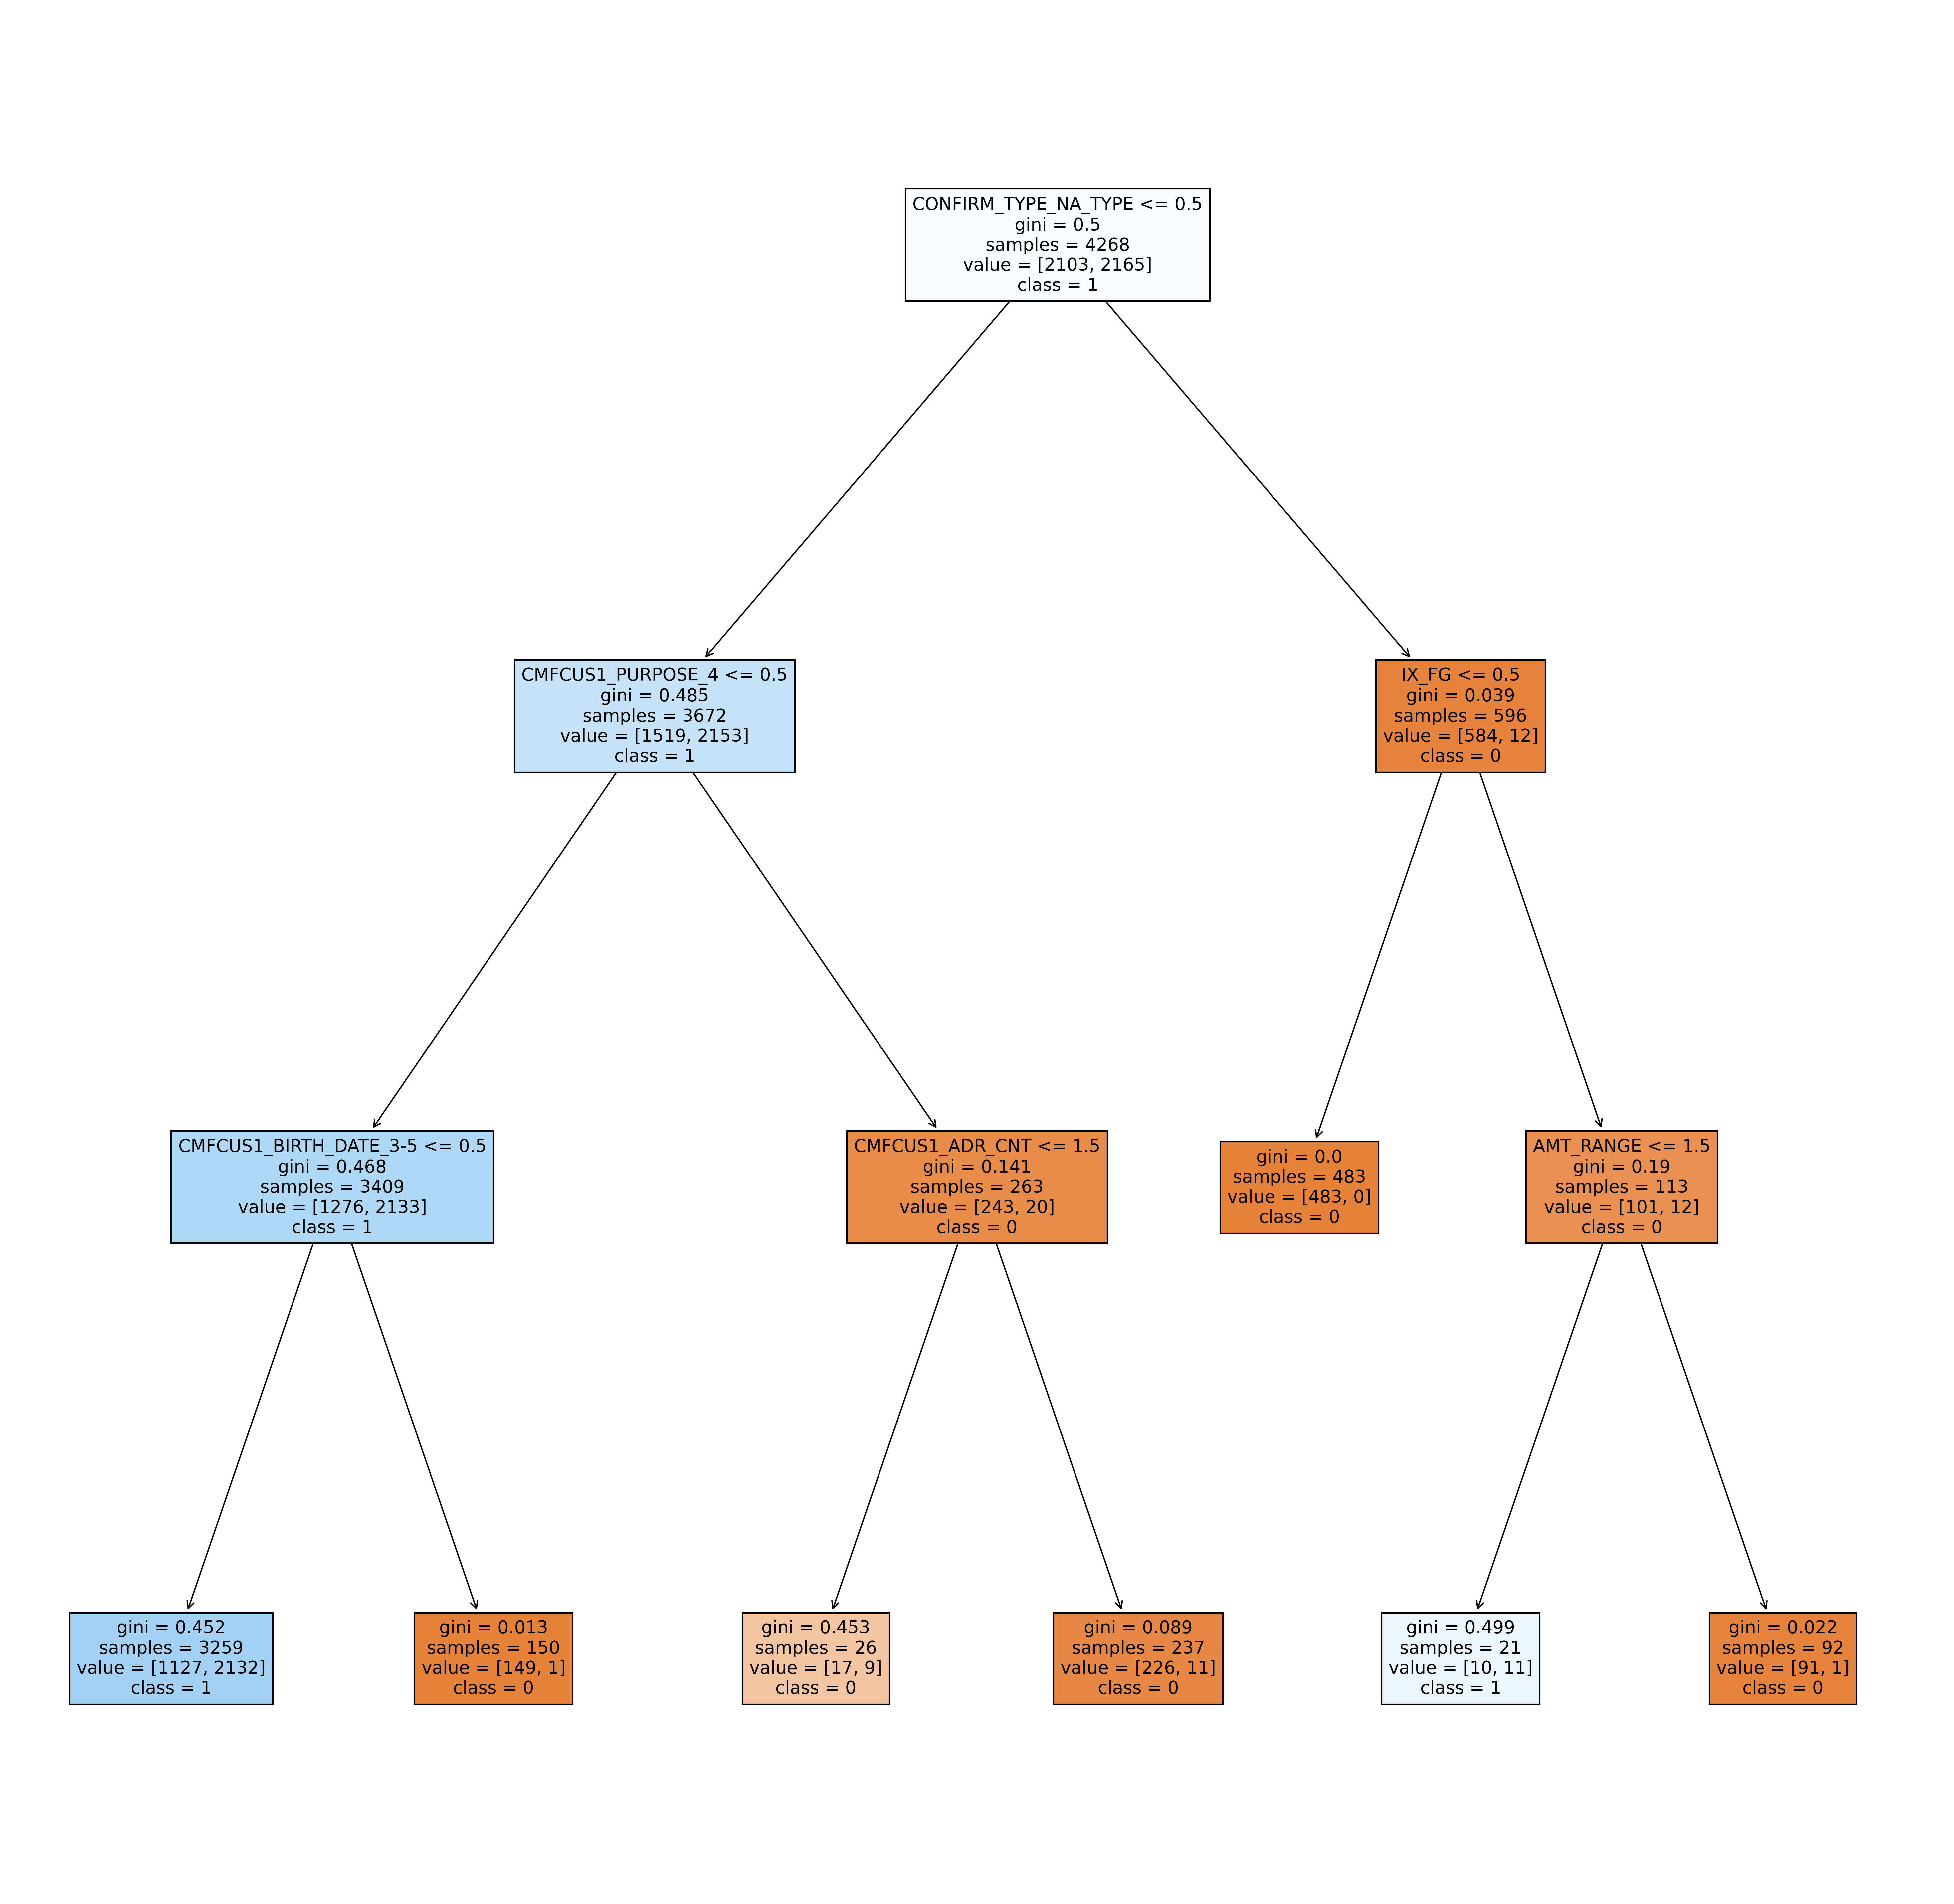

In [18]:
# Model Trainning: Tree (Cluster 0 + Upper-Resampling=SMOTE)
x0 = SMOTE_df[SMOTE_df.columns[0:-1]]
y0 = SMOTE_df[SMOTE_df.columns[-1]]

from sklearn.model_selection import train_test_split
x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size=0.3,random_state=42)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x0_train, y0_train)

fn = x0.columns
cn = y0.unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,25), dpi=300)
tree.plot_tree(model,feature_names = fn.astype('str'), class_names=cn.astype('str'), filled = True);
fig.savefig('tree.png')

In [19]:
# 用事前切好的測試集做預測測試
from sklearn.metrics import classification_report,confusion_matrix
Y0_pred = model.predict(X0_test)
print(confusion_matrix(Y0_test,Y0_pred))

[[413 503]
 [  2  19]]


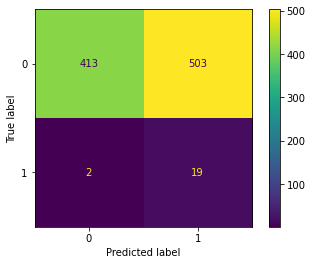

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X0_test, Y0_test)  
plt.show()

In [21]:
print(classification_report(Y0_test,Y0_pred))

              precision    recall  f1-score   support

           0       1.00      0.45      0.62       916
           1       0.04      0.90      0.07        21

    accuracy                           0.46       937
   macro avg       0.52      0.68      0.35       937
weighted avg       0.97      0.46      0.61       937



In [22]:
# Model Trainning: Logistic (Cluster 0 + Upper-Resampling=SMOTE)
x0 = SMOTE_df[SMOTE_df.columns[0:-1]]
y0 = SMOTE_df[SMOTE_df.columns[-1]]

x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size=0.3,random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x0_train,y0_train)
Y0_pred = model.predict(X0_test)

print(classification_report(Y0_test,Y0_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       916
           1       0.06      0.57      0.11        21

    accuracy                           0.80       937
   macro avg       0.53      0.69      0.50       937
weighted avg       0.97      0.80      0.87       937



C:\Users\ZE311MT\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


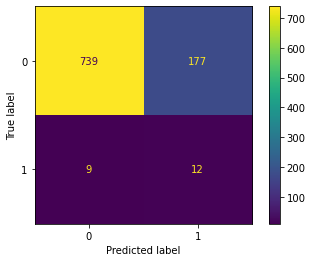

In [23]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X0_test, Y0_test)  
plt.show()

In [24]:
# 測試集先獨立切好，不要受到後續 Resampling 的影響
# 用大寫 X,Y 作區別，重採樣後皆用小寫
# slice the test data before we resample it
# set a seed code to ensure output can be comparable
X1 = df_cluster_1.iloc[:, 0:-2]
Y1 = df_cluster_1['SAR']
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3,random_state=42)

In [25]:
# Resampling: SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x1 = df_cluster_1.iloc[:, 0:-2]
y1 = df_cluster_1['SAR']
x1, y1 = oversample.fit_resample(x1, y1)

counter = Counter(y1)
print(counter)

#演算法本身就必定會平衡

Counter({0: 6718, 1: 6718})


In [26]:
SMOTE_df = pd.concat([x1,y1], axis=1, ignore_index=False)
SMOTE_df

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,CMFCUS1_AML_BUSINESS,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,...,CORP_TYPE_NA_TYPE,CORP_TYPE_Z,CMFCUS25_BRANCH_1,CMFCUS25_BRANCH_2,CMFCUS25_BRANCH_3,CMFCUS25_BRANCH_4,CMFCUS25_BRANCH_NA_TYPE,CHANNEL_4,CHANNEL_5,SAR
0,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13431,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
13432,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
13433,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
13434,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


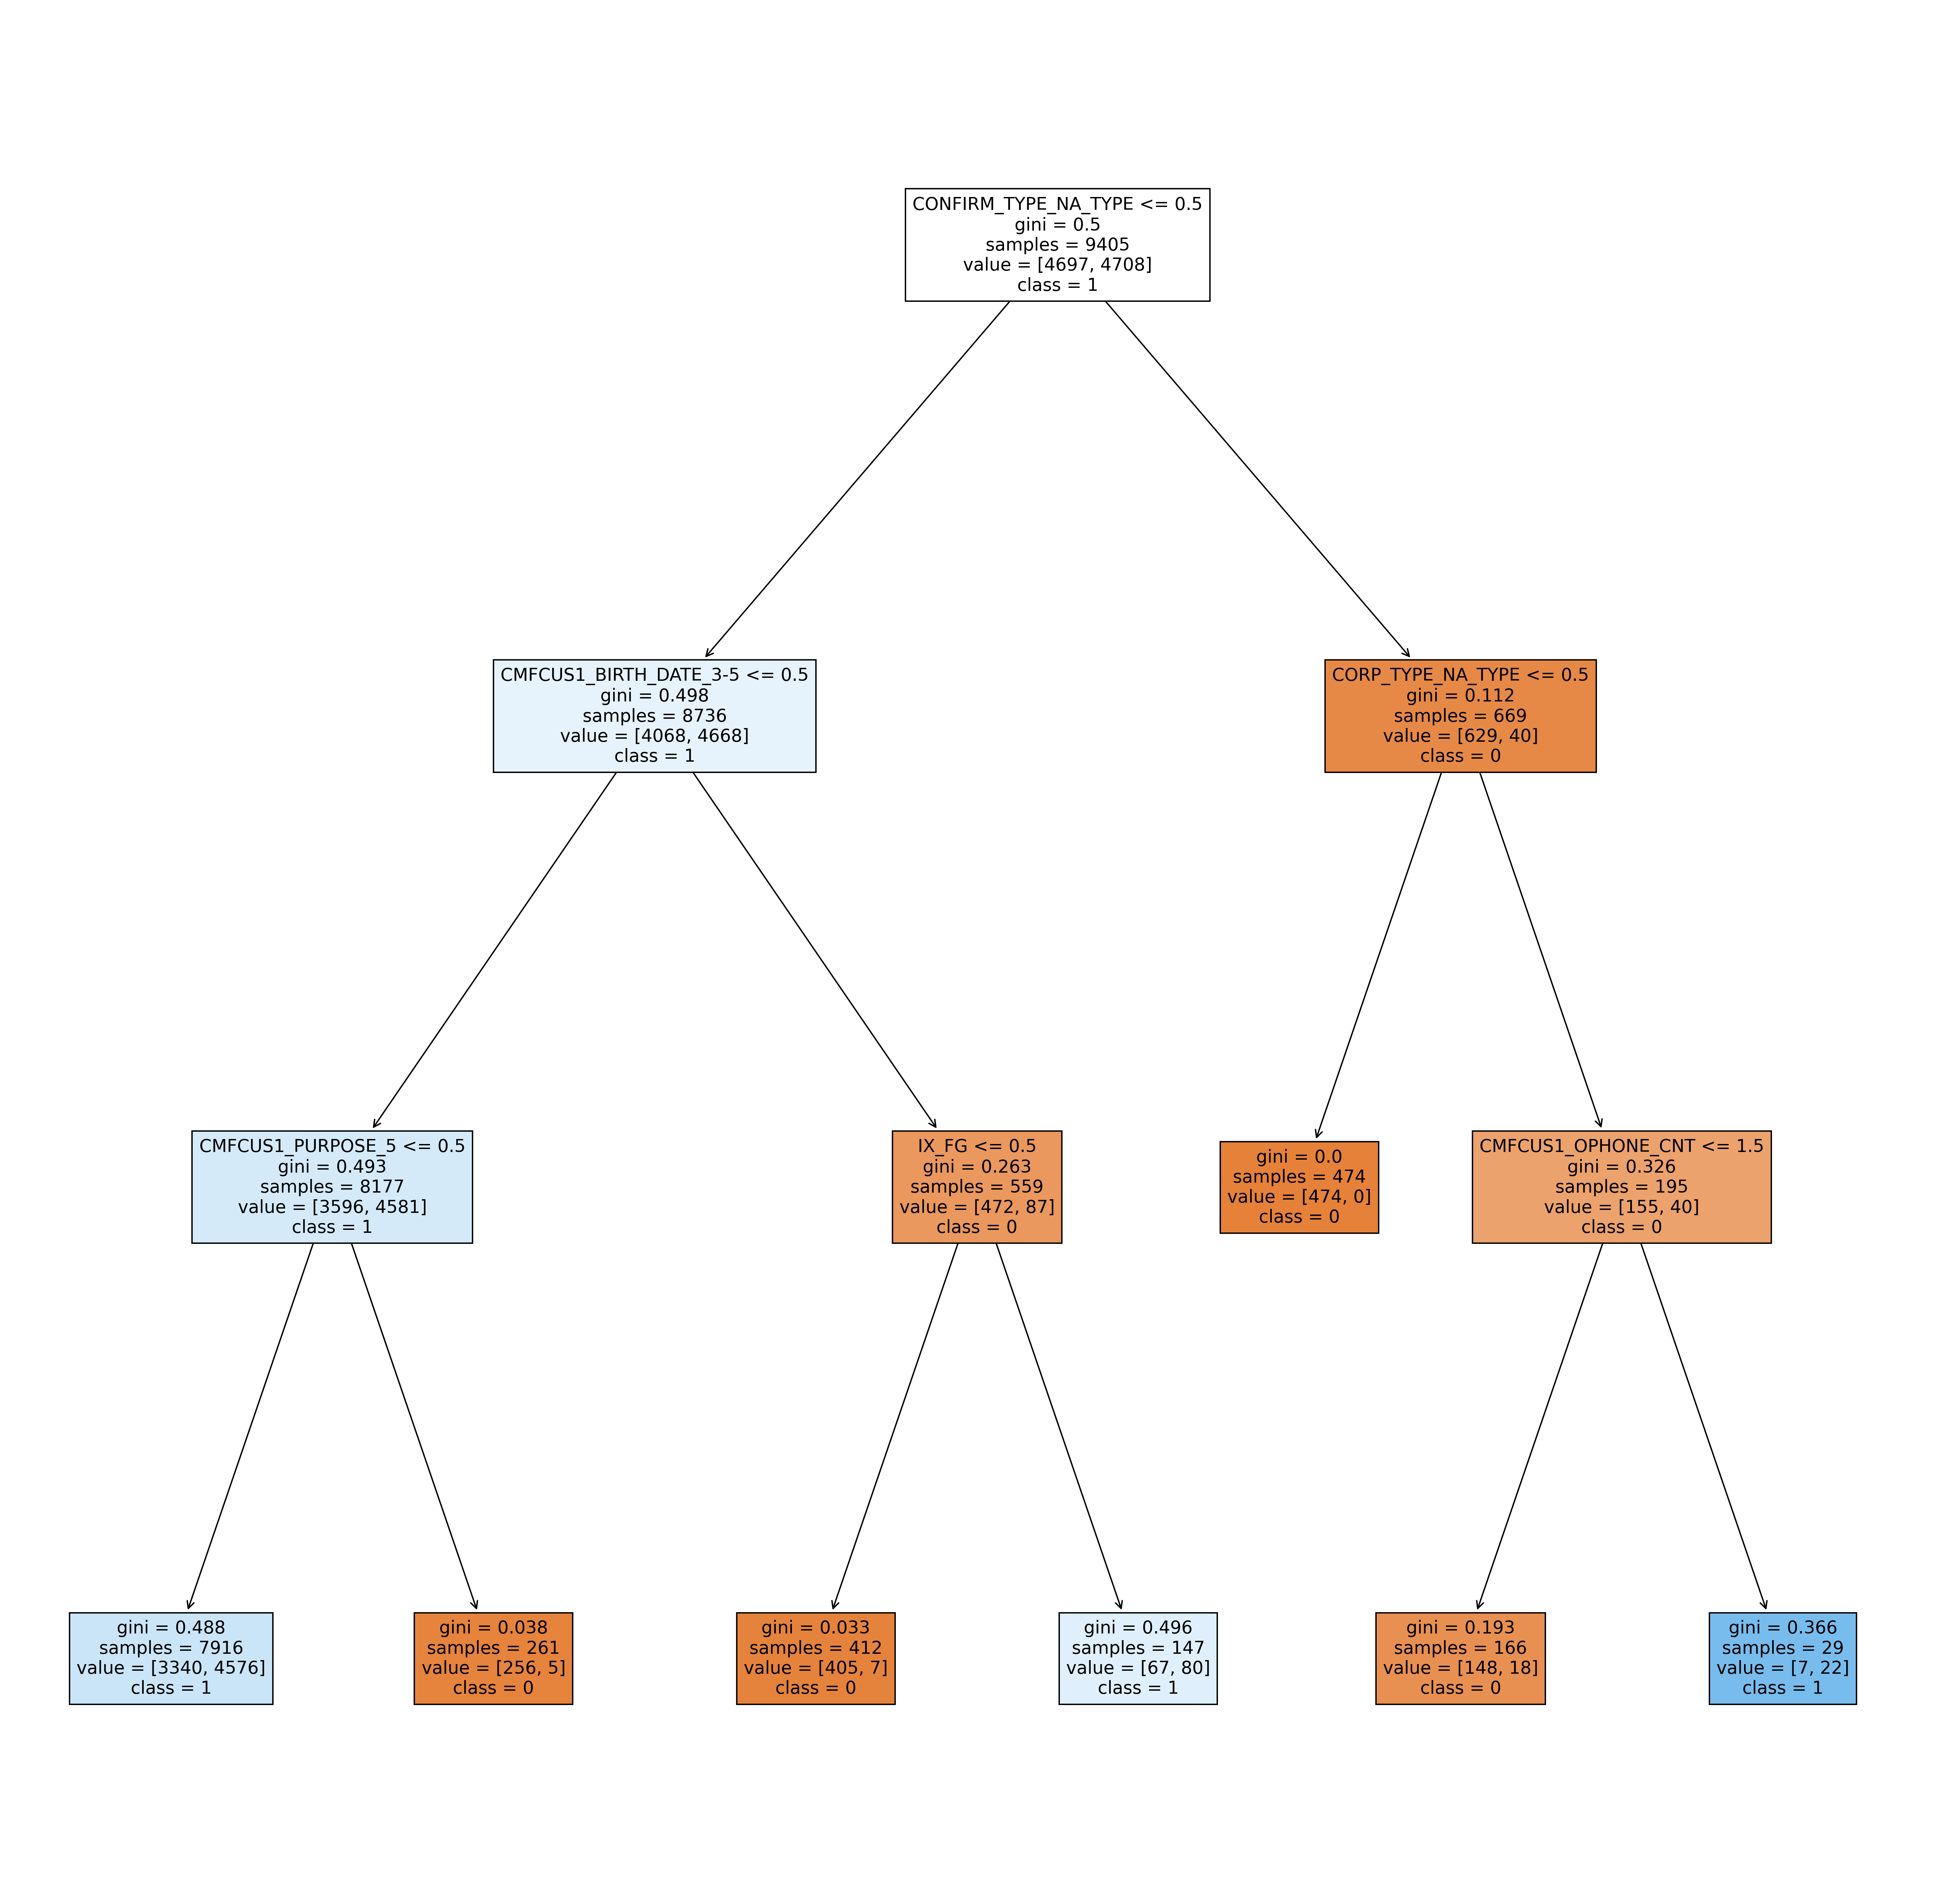

In [27]:
# Model Trainning: Tree (Cluster 1 + Upper-Resampling=SMOTE)
x1 = SMOTE_df[SMOTE_df.columns[0:-1]]
y1 = SMOTE_df[SMOTE_df.columns[-1]]

from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3,random_state=42)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x1_train, y1_train)

fn = x1.columns
cn = y1.unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,25), dpi=300)
tree.plot_tree(model,feature_names = fn.astype('str'), class_names=cn.astype('str'), filled = True);
fig.savefig('tree.png')

In [28]:
# 用事前切好的測試集做預測測試
from sklearn.metrics import classification_report,confusion_matrix
Y1_pred = model.predict(X1_test)
print(confusion_matrix(Y1_test,Y1_pred))

[[ 579 1436]
 [   4   29]]


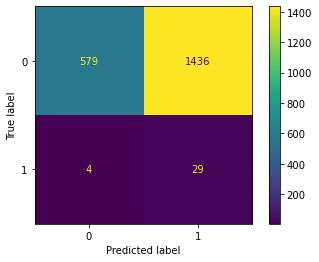

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X1_test, Y1_test)  
plt.show()

In [30]:
print(classification_report(Y1_test,Y1_pred))

              precision    recall  f1-score   support

           0       0.99      0.29      0.45      2015
           1       0.02      0.88      0.04        33

    accuracy                           0.30      2048
   macro avg       0.51      0.58      0.24      2048
weighted avg       0.98      0.30      0.44      2048



In [31]:
# Model Trainning: Logistic (Cluster 1 + Upper-Resampling=SMOTE)
x1 = SMOTE_df[SMOTE_df.columns[0:-1]]
y1 = SMOTE_df[SMOTE_df.columns[-1]]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3,random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x1_train,y1_train)
Y1_pred = model.predict(X1_test)

print(classification_report(Y1_test,Y1_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88      2015
           1       0.01      0.18      0.03        33

    accuracy                           0.78      2048
   macro avg       0.50      0.49      0.45      2048
weighted avg       0.97      0.78      0.86      2048



C:\Users\ZE311MT\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


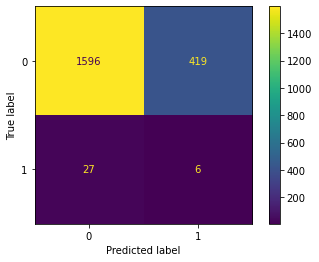

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X1_test, Y1_test)  
plt.show()